In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

file = r'eCO2mix_RTE_Annuel-Definitif_2017.xlsx'
df = pd.read_excel(file)
#df.head()

df["DateTime"] = df["Date"] + ' ' + df["Heures"]
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M')

#cols = ['Perimetre', 'Nature', 'DateTime'] + [col for col in df if col != 'DateTime' and col != 'Perimetre' and col != 'Nature']
#df = df[cols]

In [84]:
df['FioulReCalc'] = df['FioulTAC'] + df['FioulCogen'] + df['FioulAutres']
df['GazReCalc'] = df['GazTAC'] + df['GazCogen'] + df['GazCCG'] + df['GazAutres']
df['HydrauliqueReCalc'] = df['HydrauliqueFilEauPlusEcluses'] + df['HydrauliqueLacs'] + df['HydrauliqueSTEPturbinage']
df['BioenergiesReCalc'] = df['BioenergiesDechets'] + df['BioenergiesBiomasse'] + df['BioenergiesBiogaz']
df['EchPhysiquesReCalc'] = df['EchCommAngleterre'] + df['EchCommEspagne'] + df['EchCommItalie'] + df['EchCommSuisse'] + df['EchCommAllemagneBelgique']

df['Fossiles'] = df['Fioul'] + df['Charbon'] + df['Gaz']
df['Renouv'] = df['Eolien'] + df['Solaire'] + df['Hydraulique'] + df['Bioenergies']

df['ProdTot'] = df['Nucleaire'] + df['Fossiles'] + df['Renouv']

df['ConsommationReCalc'] = df['ProdTot'] + df['Pompage'] + df['EchPhysiques']

df['NucleaireFrac'] = df['Nucleaire']/df['ProdTot']
df['RenouvFrac'] = df['Renouv']/df['ProdTot']
df['FossilesFrac'] = df['Fossiles']/df['ProdTot']
df['ProdTotFrac'] = df['ProdTot']/df['ProdTot']


In [85]:
df2 = df.set_index('DateTime', inplace=False)
df3 = df2.dropna()
df3.head()

,Perimetre,Nature,Date,Heures,Consommation,PrevisionJ-1,PrevisionJ,Fioul,Charbon,Gaz,...,BioenergiesReCalc,EchPhysiquesReCalc,Fossiles,Renouv,ProdTot,ConsommationReCalc,NucleaireFrac,RenouvFrac,FossilesFrac,ProdTotFrac
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,France,Donnees definitives,2017-01-01,00:00,76259.0,76100.0,76500.0,164.0,1579.0,7617.0,...,1090.0,4787.0,9360.0,7898.0,70786.0,76259.0,0.756195,0.111576,0.132230,1.0
2017-01-01 00:30:00,France,Donnees definitives,2017-01-01,00:30,74981.0,74900.0,75100.0,601.0,1506.0,6626.0,...,1100.0,4787.0,8733.0,8330.0,70519.0,74980.0,0.758037,0.118124,0.123839,1.0
2017-01-01 01:00:00,France,Donnees definitives,2017-01-01,01:00,72912.0,73400.0,73400.0,596.0,1291.0,6593.0,...,1091.0,4627.0,8480.0,7010.0,68921.0,72913.0,0.775250,0.101711,0.123039,1.0
2017-01-01 01:30:00,France,Donnees definitives,2017-01-01,01:30,72682.0,73900.0,73900.0,587.0,1028.0,6595.0,...,1099.0,4627.0,8210.0,6881.0,68520.0,72683.0,0.779758,0.100423,0.119819,1.0
2017-01-01 02:00:00,France,Donnees definitives,2017-01-01,02:00,72166.0,73300.0,73300.0,599.0,1024.0,6548.0,...,1100.0,4723.0,8171.0,6544.0,68096.0,72167.0,0.783908,0.096100,0.119992,1.0


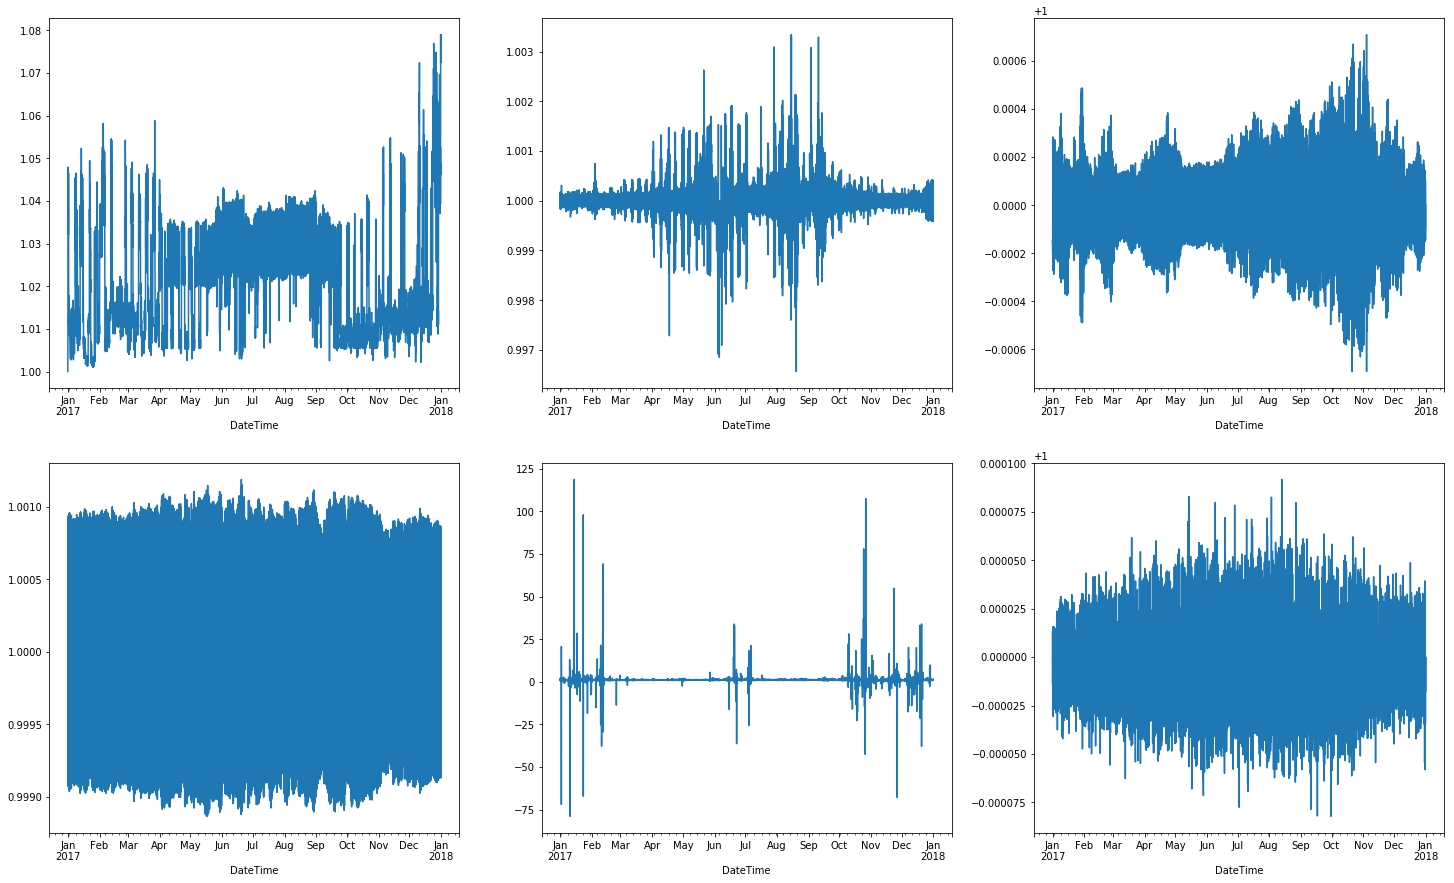

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(25,15))

(df3['Fioul']/df3['FioulReCalc']).plot(ax=axes[0,0])
(df3['Gaz']/df3['GazReCalc']).plot(ax=axes[0,1])
(df3['Hydraulique']/df3['HydrauliqueReCalc']).plot(ax=axes[0,2])
(df3['Bioenergies']/df3['BioenergiesReCalc']).plot(ax=axes[1,0])
(df3['EchPhysiques']/df3['EchPhysiquesReCalc']).plot(ax=axes[1,1])
(df3['Consommation']/df3['ConsommationReCalc']).plot(ax=axes[1,2])

# Annual plots

Text(0,0.5,'Production (MW)')

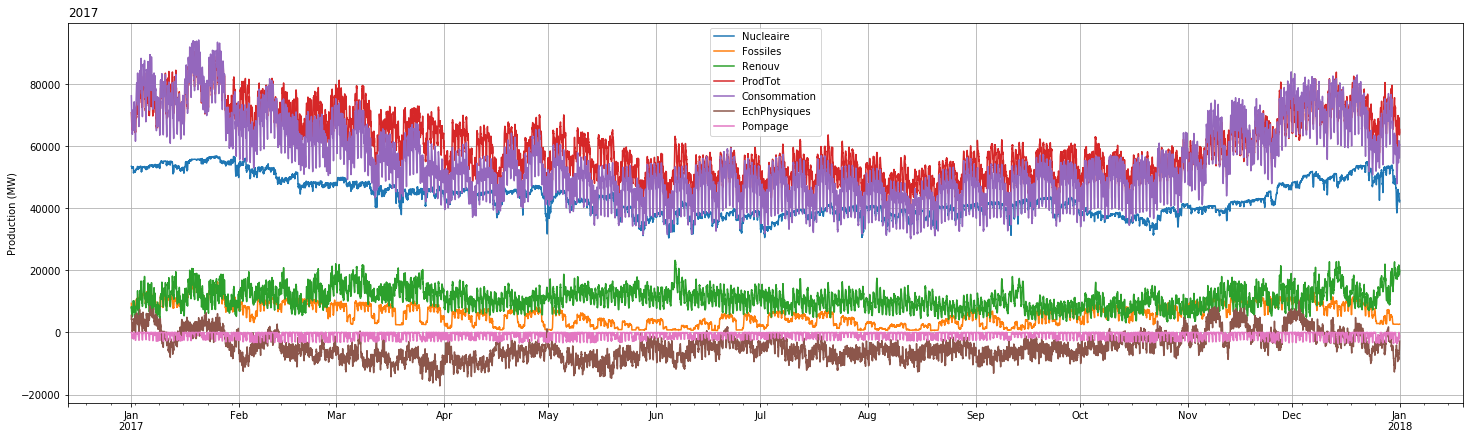

In [118]:
#fig = plt.figure(figsize=(25,5))
#axe1 = fig.add_subplot(1, 1, 1)

df5 = df3['2017-01-01' : '2017-12-31']
axe1 = df5.plot(y=['Nucleaire', 'Fossiles', 'Renouv', 'ProdTot', 'Consommation', 'EchPhysiques', 'Pompage'], \
                grid=True,\
                figsize=(25, 7))
axe1.set_title('2017', loc='left')
axe1.set_xlabel('')
axe1.set_ylabel('Production (MW)')
#axe1.xaxis.set_label_coords(1.02, 0)
#axe1.grid(True, which='minor', axis='x' )
#axe1.xaxis.set_major_locator(mdates.MonthLocator())
    
#plotProdPerPeriod(['Nucleaire', 'Fossiles', 'Renouv', 'ProdTot', 'Consommation', 'EchPhysiques', 'Pompage'], \
#                  '2017-01-01', '2017-12-31', \
#                  '2017', \
#                  'Month', \
#                  axe1)

#fig2, axe2 = plt.subplots(nrows=1, ncols=1, figsize=(25,5))
#plotProdPerPeriod(['Renouv'], \
#                  '2017-01-01', '2017-12-31', \
#                  '2017', \
#                  'Month', \
#                  axe2)

# Monthly plots

In [102]:
#df4 = df3.loc[:, 'Fioul' : 'Bioenergies']

def plotProdPerPeriod(what, dateinf, datesup, title, xlabel, ax):
    df5 = df3[dateinf : datesup]
    df5.head(200)
    ax = df5.plot(\
                  y=what, \
                  grid=True,\
                  ax=ax)
    ax.set_title(title, loc='left')
    #ax.text(0.5, 0.5, title)
    #ax.xaxis.labelpad = 10
    ax.set(xlabel=xlabel, ylabel='Production (MW)')
    ax.xaxis.set_label_coords(1.02, 0)
    #ax.grid(True, which='minor', axis='x' )
    #set ticks every week
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    #set major ticks format
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [ ]:

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,25))
plotProdPerPeriod('2017-01-01', '2017-01-31', 'January', 'Day', axes[0,0])
plotProdPerPeriod('2017-02-01', '2017-02-28', 'February', 'Day', axes[0,1])
plotProdPerPeriod('2017-03-01', '2017-03-31', 'March', 'Day', axes[0,2])
plotProdPerPeriod('2017-04-01', '2017-04-30', 'April', 'Day', axes[1,0])
plotProdPerPeriod('2017-05-01', '2017-05-31', 'May', 'Day', axes[1,1])
plotProdPerPeriod('2017-06-01', '2017-06-30', 'June', 'Day', axes[1,2])
plotProdPerPeriod('2017-07-01', '2017-07-31', 'July', 'Day', axes[2,0])
plotProdPerPeriod('2017-08-01', '2017-08-31', 'August', 'Day', axes[2,1])
plotProdPerPeriod('2017-09-01', '2017-09-30', 'September', 'Day', axes[2,2])
plotProdPerPeriod('2017-10-01', '2017-10-31', 'October', 'Day', axes[3,0])
plotProdPerPeriod('2017-11-01', '2017-11-30', 'November', 'Day', axes[3,1])
plotProdPerPeriod('2017-12-01', '2017-12-31', 'December', 'Day', axes[3,2])

    #fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(25,7))
    #df5.plot(y=['NucleaireFrac', 'FossilesFrac', 'RenouvFrac', 'ProdTotFrac'], grid=True, ax=axes[1])
    #axes[1].set(xlabel='Date', ylabel='Fraction')
    #axes[1].grid(True, which='minor', axis='x' )

    #df5.plot.scatter(x='NucleaireFrac', y='RenouvFrac', grid=True, ax=axes[2])
    #axes[2].set(xlabel='NucleaireFrac', ylabel='RenouvFrac')

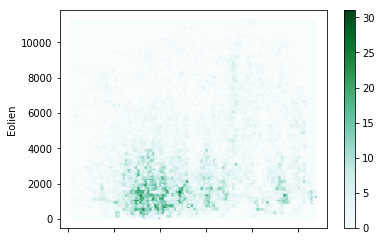

In [53]:
df.plot.hexbin(x='Nucleaire', y='Eolien', gridsize=100)